Workshop 1 MINE-4101
Universidad de los Andes
Andres Mauricio Martinez Celis 

Selected City: New orleans,Louisiana, United States

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [2]:
#Definitions section
nonUtilWords=["mbps",'max','fast','standard','amazon','video','body','fire','apple','steel','stainless','55','premium','system']
popularAmeniteies={}

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [4]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings New Orleans.csv.gz")

In [5]:
listings_df.shape

(7216, 75)

In [6]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [7]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()
#all records are unique

7216

In [8]:
listings_df["host_id"].nunique()
#The host has many properties

3580

In [9]:
df_filtrado = listings_df.loc[listings_df['host_id'] == 90876851] #filter to a specific Host ID.

In [10]:
listings_df.sample(5) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
109,945961,https://www.airbnb.com/rooms/945961,20230606052720,2023-06-06,city scrape,Bed and breakfast in New Orleans · ★4.69 · 1 b...,Fleur De Lis Mansion BED AND BREAKFAST<br />B&...,The Mansion is prime location and walking dist...,https://a0.muscache.com/pictures/73706396/d4d6...,4981655,https://www.airbnb.com/users/show/4981655,Jim,2013-02-05,NaN,I am a retired Real Estate developer. We have...,within an hour,96%,99%,NaN,https://a0.muscache.com/im/pictures/user/16b36...,https://a0.muscache.com/im/pictures/user/16b36...,Lower Garden District,17,28,['phone'],t,t,"New Orleans, Louisiana, United States",Lower Garden District,NaN,29.93846,-90.06831,Room in bed and breakfast,Hotel room,2,NaN,1 shared bath,1.0,1.0,"[""Shared outdoor kitchen"", ""Freezer"", ""Stove"",...",$49.00,2,360,1.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,19,40,67,67,2023-06-06,170,21,2,2013-03-08,2023-05-25,4.69,4.78,4.72,4.86,4.82,4.70,4.72,"Exempt: This listing is a licensed hotel, mote...",f,13,5,1,0,1.36
3635,45737561,https://www.airbnb.com/rooms/45737561,20230606052720,2023-06-06,city scrape,Home in New Orleans · ★4.56 · 2 bedrooms · 2 b...,Experience the true culture of New Orleans in ...,"Although largely off the tourist radar, Centra...",https://a0.muscache.com/pictures/prohost-api/H...,64365837,https://www.airbnb.com/users/show/64365837,Mike,2016-03-24,"New Orleans, LA",Dive into the unique culture & history of New ...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b8b30...,https://a0.muscache.com/im/pictures/user/b8b30...,Tulane - Gravier,66,78,"['email', 'phone', 'work_email']",t,t,"New Orleans, Louisiana, United States",Central City,NaN,29.93922,-90.08364,Entire home,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Backyard"", ""Freezer"", ""Stove"", ""Essentials"",...",$153.00,3,28,1.0,4.0,28.0,28.0,3.3,28.0,NaN,t,28,55,85,355,2023-06-06,104,32,2,2020-10-13,2023-05-14,4.56,4.60,4.75,4.79,4.69,4.15,4.47,"19STR-00000, 19-OSTR-0000",t,62,53,9,0,3.23
128,967567,https://www.airbnb.com/rooms/967567,20230606052720,2023-06-06,city scrape,Home in New Orleans · ★4.74 · 2 bedrooms · 3 b...,<b>The space</b><br />If you’re going to visit...,Part of the charm of this house is its locatio...,https://a0.muscache.com/pictures/15761598/469d...,5278748,https://www.airbnb.com/users/show/5278748,Lolis,2013-03-01,"New Orleans, LA","After spending most of my life in my hometown,...",within a few hours,100%,92%,t,https://a0.muscache.com/im/users/5278748/profi...,https://a0.muscache.com/im/users/5278748/profi...,Treme,1,2,"['email', 'phone']",t,f,"New Orleans, Louisiana, United States",Treme - Lafitte,NaN,29.96625,-90.06758,Entire home,Entire home/apt,4,NaN,2.5 

In [11]:
# Showing unique values of neighbourhoods
#listings_df["neighbourhood_cleansed"].value_counts()
listings_df["neighbourhood_cleansed"].unique()
print("Number of neighbourhood has airbnb:", len(listings_df["neighbourhood_cleansed"].unique()))

Number of neighbourhood has airbnb: 68


In [12]:
listings_df["property_type"].value_counts( normalize=True) #calculate the absolute frequency

Entire home                          0.395233
Entire rental unit                   0.233232
Entire condo                         0.112666
Private room in home                 0.054047
Entire guest suite                   0.033121
Entire townhouse                     0.026885
Entire guesthouse                    0.020787
Room in boutique hotel               0.016353
Private room in bed and breakfast    0.014135
Room in hotel                        0.013165
Entire serviced apartment            0.010116
Private room in rental unit          0.008315
Entire cottage                       0.008176
Private room in guest suite          0.007483
Private room in resort               0.006513
Entire loft                          0.006375
Entire bungalow                      0.003187
Entire villa                         0.003049
Shared room in home                  0.002772
Room in aparthotel                   0.002772
Room in bed and breakfast            0.002633
Entire vacation home              

In [13]:
listings_df["number_of_reviews"].value_counts()

0      966
1      374
2      241
3      152
4      129
      ... 
461      1
335      1
529      1
498      1
370      1
Name: number_of_reviews, Length: 439, dtype: int64

In [14]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    7216.000000
mean        4.735172
std         2.806263
min         0.000000
5%          2.000000
25%         2.000000
50%         4.000000
75%         6.000000
95%        10.000000
max        16.000000
Name: accommodates, dtype: float64

In [15]:
# sort the columns by the one with the most null values to the one with the least 
percentage_result = listings_df.isnull().sum()/listings_df.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

,columns,NullsPercentage
29,neighbourhood_group_cleansed,100.000000
49,calendar_updated,100.000000
35,bathrooms,100.000000
14,host_about,44.041020
27,neighbourhood,29.004989
7,neighborhood_overview,29.004989
13,host_location,25.415743
15,host_response_time,21.036585
16,host_response_rate,21.036585
68,license,19.429047


In [16]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [17]:
#Process the list of big amenities, get the most popular services in the list of unique amenities in dataset
def getIndividualAmenities(amenities):
    returnAmen=[]
    nltk.download('stopwords')
    full_text=" ".join(amenities)
    words=re.findall(r'\w+', full_text.lower())
    stop_words = set(stopwords.words('english'))
    # Apply filter for a stop word, it's not necessary to count
    filter_words = [word for word in words if (word not in stop_words) and (word not in nonUtilWords)]
    word_counter = Counter(filter_words)
    most_common_words = word_counter.most_common(20)
    for word,frequ in most_common_words:
        returnAmen.append(word)
    return returnAmen

In [18]:
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

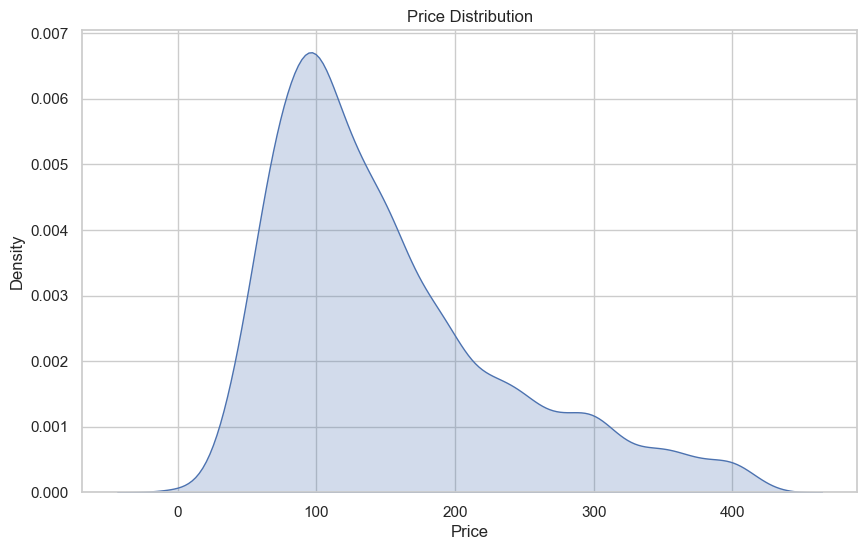

In [19]:
# Plotting a boxplot for number of reviews
listings_df["price_float"].describe()
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.kdeplot(data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], fill=True)  
plt.xlabel('Price')  
plt.ylabel('Density') 
plt.title('Price Distribution')  
plt.show()

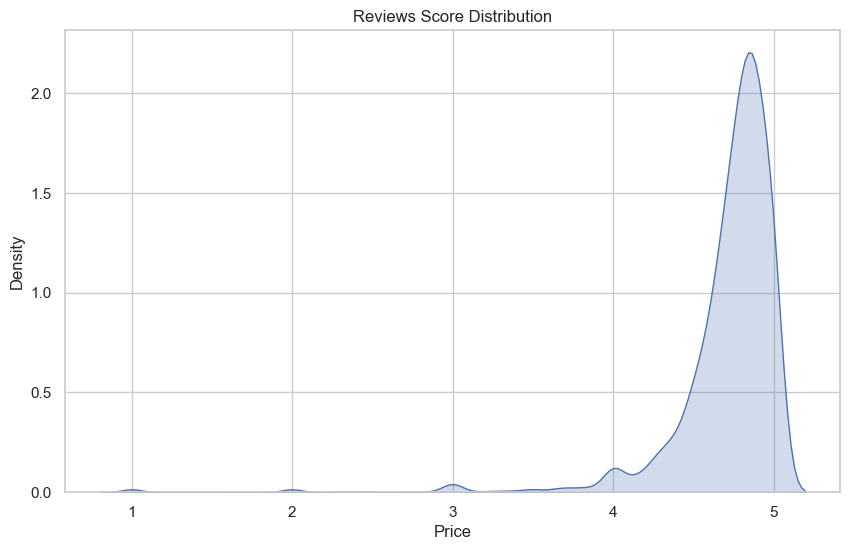

In [20]:
# Plotting a boxplot for number of reviews
#listings_df["review_scores_value"].describe()
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.kdeplot(data=listings_df['review_scores_value'], fill=True)
plt.xlabel('Price')  
plt.ylabel('Density') 
plt.title('Reviews Score Distribution')  
plt.show()

In [21]:
listings_sample_df = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.15)
listings_sample_df.shape


(996, 76)

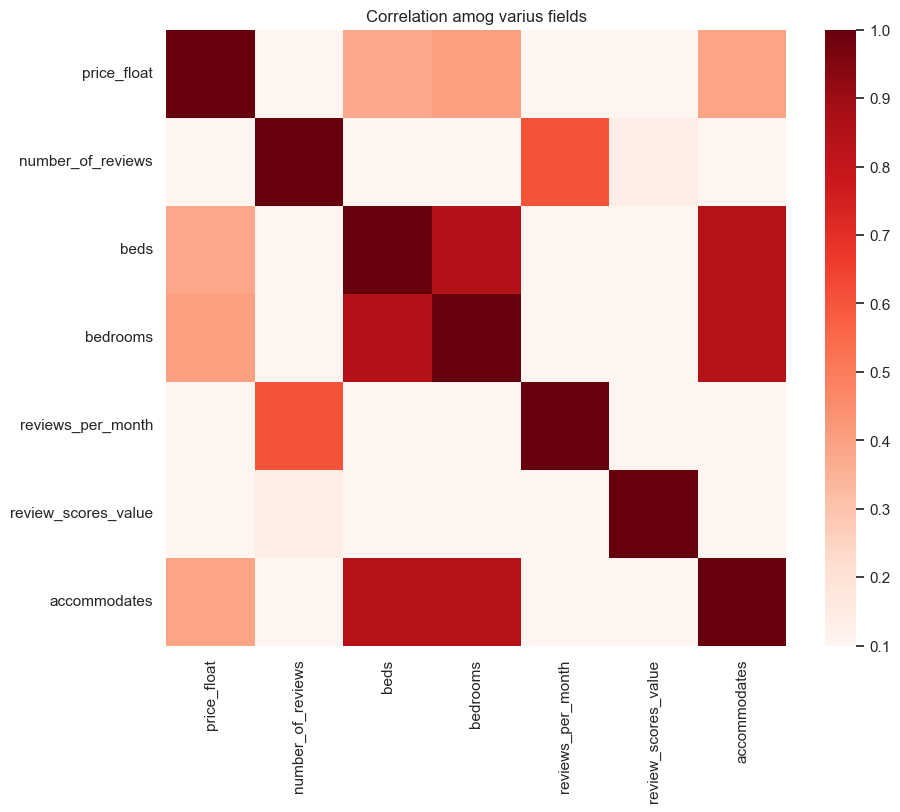

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["price_float", "number_of_reviews", "beds", "bedrooms", "reviews_per_month", "review_scores_value","accommodates"]].corr(),
    vmin=0.1, vmax=1,
    cmap="Reds"
)
plt.title("Correlation amog varius fields")
plt.show()

0.40302715304763104


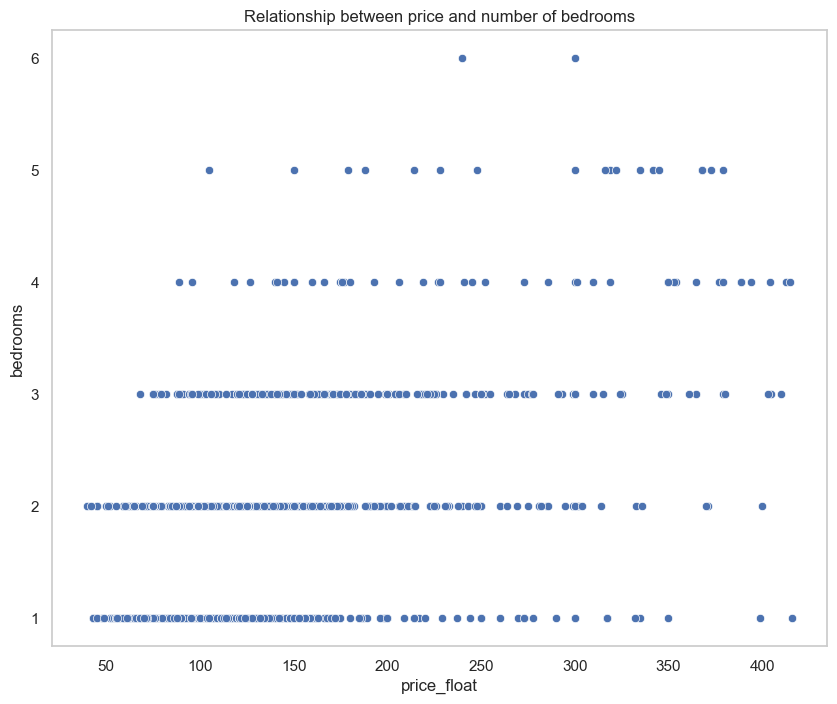

In [23]:
print(listings_df['price_float'].corr(listings_df['bedrooms']))
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["bedrooms"]
)
plt.title("Relationship between price and number of bedrooms")
plt.grid()
plt.show()

Inicio de la estrategia de mercado:

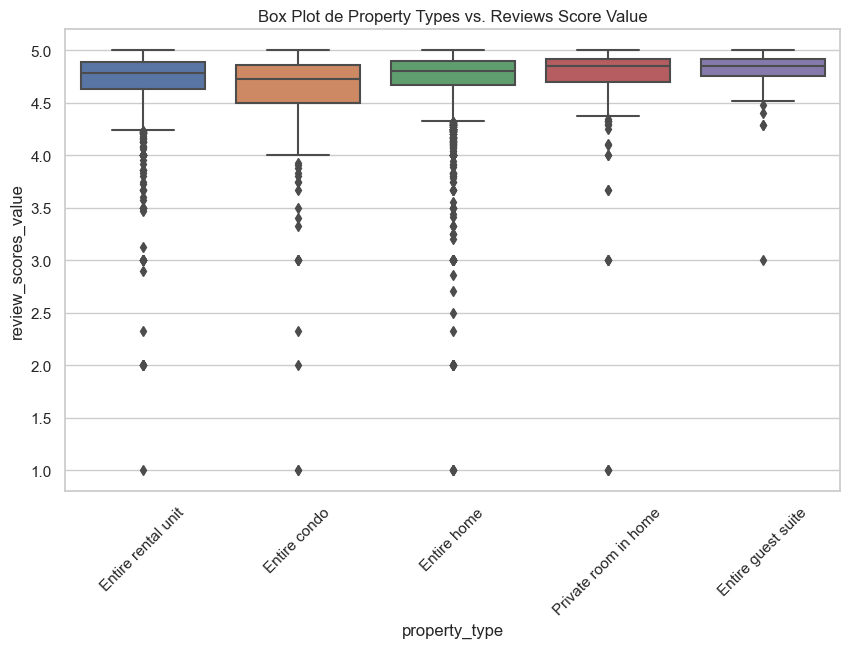

In [24]:
#Use only the first 5 categories since they are more than 78% of those used
top_property_types = listings_df['property_type'].value_counts().head(5).index.tolist()
filtered_dataframe = listings_df[listings_df['property_type'].isin(top_property_types)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='property_type', y='review_scores_value', data=filtered_dataframe)
plt.title('Box Plot de Property Types vs. Reviews Score Value')
plt.xticks(rotation=45)
plt.show()


In [25]:
listings_df["availability_365"].describe() #Can use because has not outliers

count    7216.000000
mean      182.901192
std       124.959809
min         0.000000
25%        79.000000
50%       173.000000
75%       310.000000
max       365.000000
Name: availability_365, dtype: float64

In [26]:
PropertyTypeFreq = listings_df["property_type"].value_counts(normalize=True)
most_representative_Propertypes = PropertyTypeFreq.loc[PropertyTypeFreq > 0.05].index.tolist()

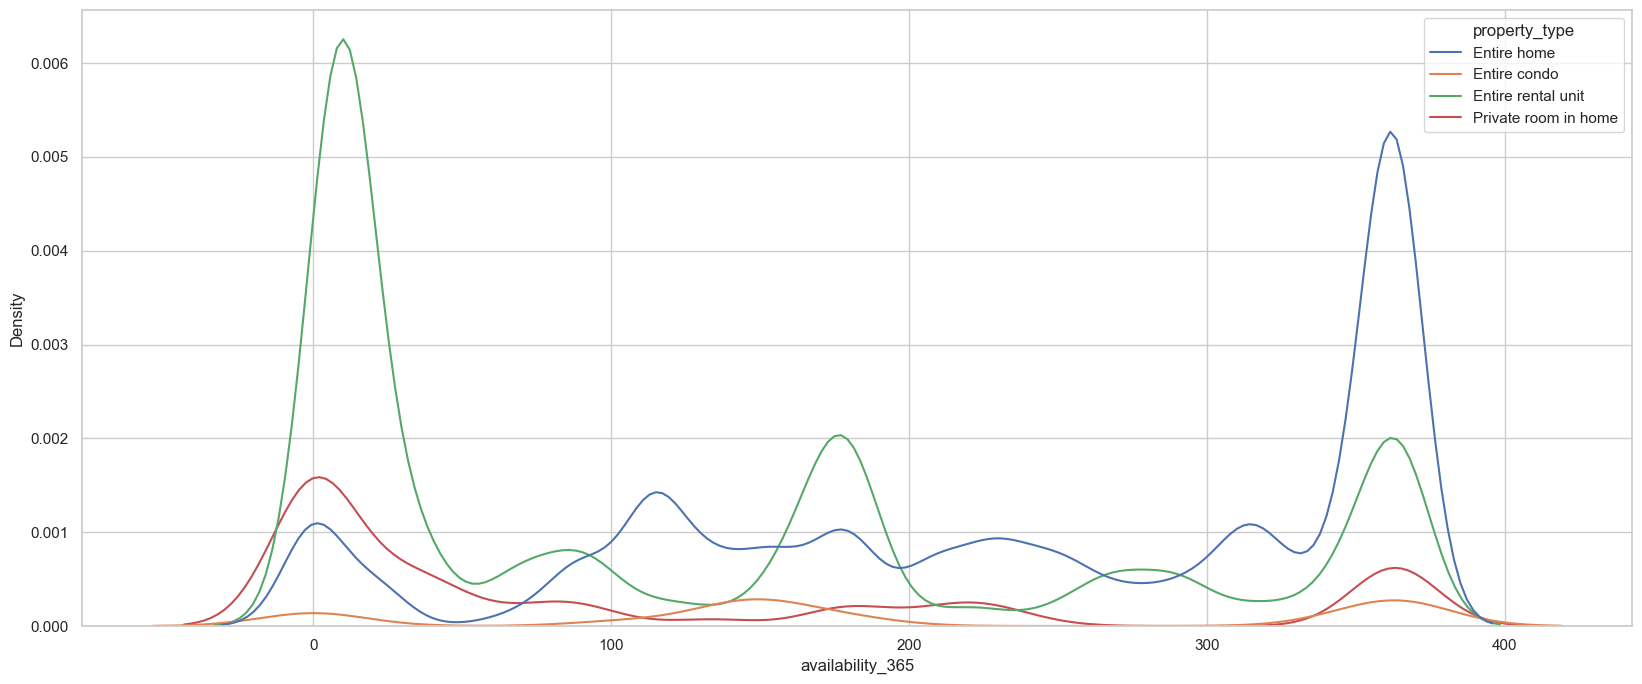

In [27]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["availability_365"]].loc[listings_df["property_type"].isin(most_representative_Propertypes)],
    x="availability_365",
    hue="property_type",
    bw_adjust=.4,
    ax=ax
)
plt.show()

In [28]:
#Average to availability of the those properties
#check the medium price in a top neighborhoods
print("Mean of availability:")
print("General Mean: ",listings_df['availability_365'].mean())
for typeP in most_representative_Propertypes:
    propertyDF = listings_df[listings_df['property_type'] == typeP]
    avarageDisponibility = round(propertyDF['availability_365'].mean())
    print(typeP,"has an average availability of ",avarageDisponibility,"days")

Mean of availability:
General Mean:  182.90119179600887
Entire home has an average availability of  184 days
Entire rental unit has an average availability of  192 days
Entire condo has an average availability of  205 days
Private room in home has an average availability of  146 days


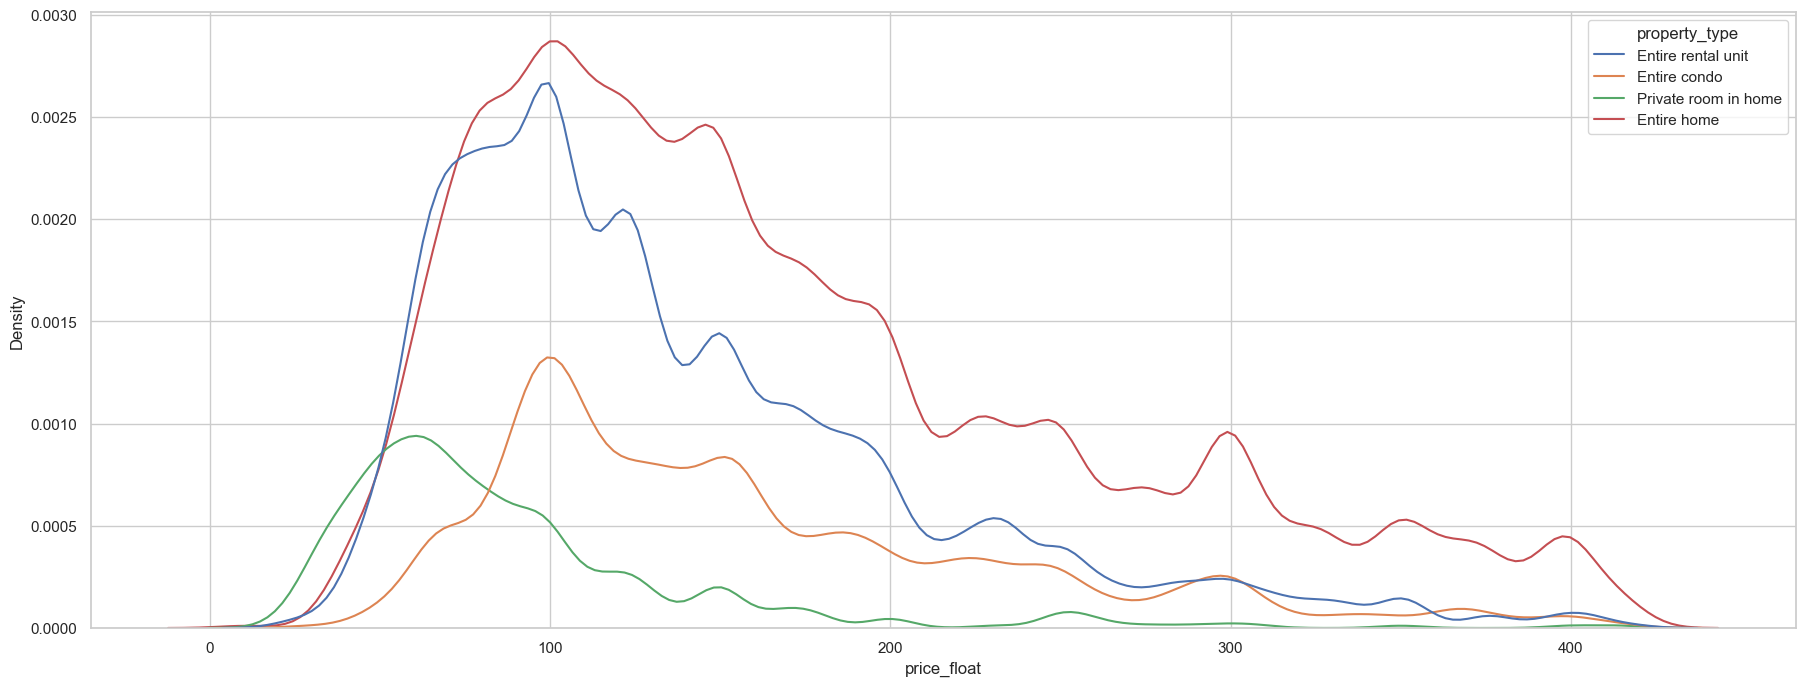

In [29]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, figsize=(22, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5* iqr)].loc[listings_df["property_type"].isin(most_representative_Propertypes)],
    x="price_float",
    hue="property_type",
    bw_adjust=0.4,
    ax=ax
)
plt.show()

In [30]:
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [31]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.4].index.tolist()
most_representative_neighbourhoods

['Central Business District',
 'Central City',
 'Seventh Ward',
 'Treme - Lafitte']

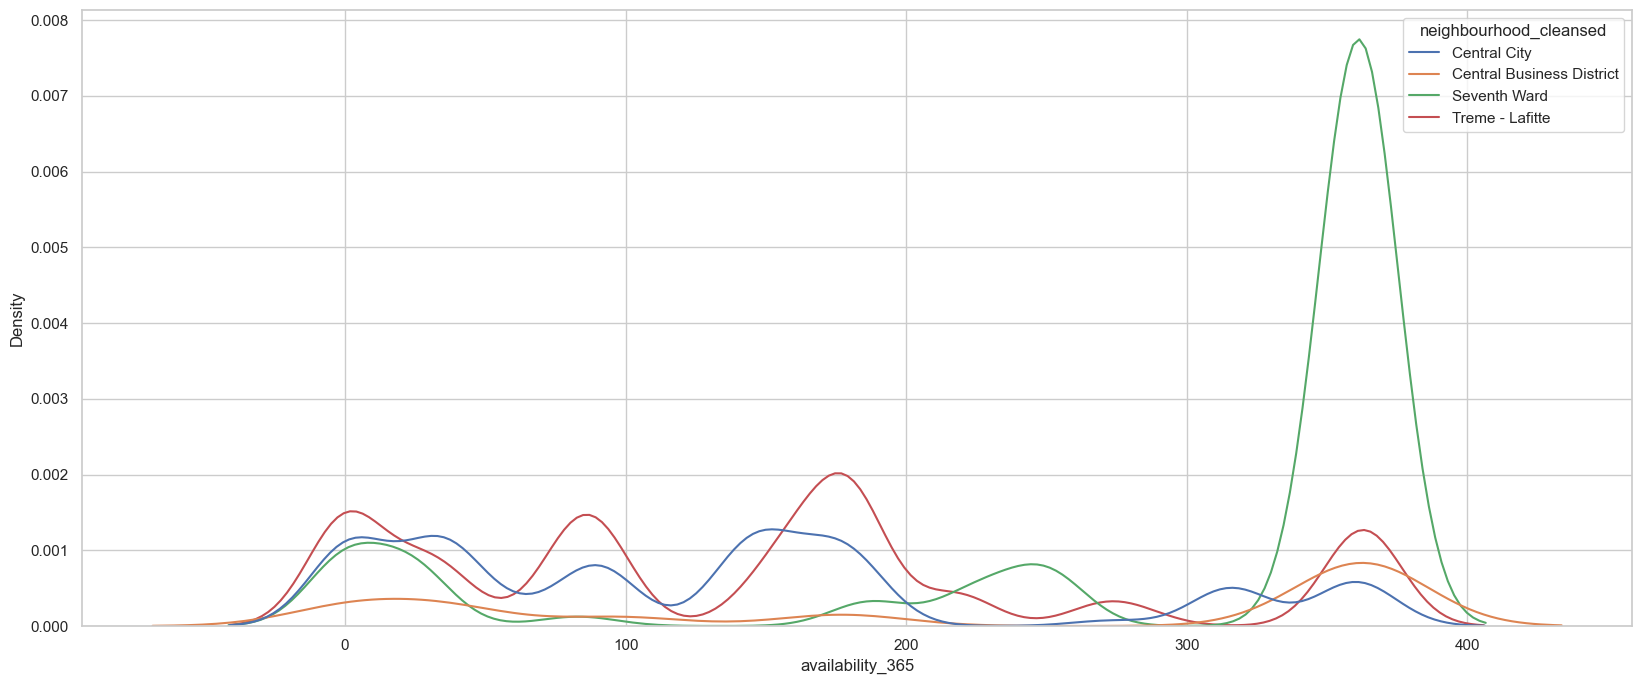

In [32]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["availability_365"]].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="availability_365",
    hue="neighbourhood_cleansed",
    bw_adjust=.4,
    ax=ax
)
plt.show()

In [33]:
#Average to availability of the those properties
for typeP in most_representative_neighbourhoods:
    propertyDF = listings_df[listings_df['neighbourhood_cleansed'] == typeP]
    avarageDisponibility = round(propertyDF['availability_365'].mean())
    print(typeP,"has an average availability of ",avarageDisponibility,"days")

Central Business District has an average availability of  212 days
Central City has an average availability of  179 days
Seventh Ward has an average availability of  168 days
Treme - Lafitte has an average availability of  161 days


In [34]:
#check the medium price in a top neighborhoods
print("Mean of prices:")
print("General Mean: ",listings_df['price_float'].mean())
for typeP in most_representative_neighbourhoods:
    propertyDF = listings_df[listings_df['neighbourhood_cleansed'] == typeP]
    avarageDisponibility = propertyDF['price_float'].mean()
    print(typeP,"has an average price of $",avarageDisponibility)

Mean of prices:
General Mean:  205.855044345898
Central Business District has an average price of $ 255.39979013641133
Central City has an average price of $ 235.97133757961782
Seventh Ward has an average price of $ 175.9276595744681
Treme - Lafitte has an average price of $ 263.2306034482759


The following four code blocks show the analysis by neighborhood, price and occupancy:

These functions look at the price of the most used properties based on a neighborhood and also the occupancy 
of these properties over the course of a year, looking at the lowest price with the highest occupancy within
the time period. 

In [35]:
#Shows the average occupancy of the properties by neighborhood 
def bestNeighBydisponibilty(neig):
    dfpredTreme = listings_df.loc[listings_df['neighbourhood_cleansed'] == neig]
    fig, ax = plt.subplots(1, figsize=(22, 8))
    sns.kdeplot(
        data=dfpredTreme.loc[dfpredTreme["price_float"] <= (q3 + 1.5* iqr)].loc[dfpredTreme["property_type"].isin(most_representative_Propertypes)],
        x="price_float",
        hue="property_type",
        bw_adjust=0.4,
    )
    ax.set_xlabel("Price")
    ax.set_ylabel("Density of "+ neig+" Neighbourhood")
    plt.show()
    return 1

In [36]:
#Displays price distribution according to a specific neighborhood 
def meanOcupationByNeig(neig):
    types=[]
    valuesDisponibility=[]
    dfpredTreme = listings_df.loc[listings_df['neighbourhood_cleansed'] == neig]
    for propertyPe in most_representative_Propertypes:
        disponibility = dfpredTreme.loc[listings_df['property_type'] == propertyPe, 'availability_365'].mean()
        types.append(propertyPe)
        valuesDisponibility.append(disponibility)
    
    plt.figure(figsize=(20, 5))
    plt.bar(types, valuesDisponibility)
    # Add labels and title
    plt.xlabel('Property Type')
    plt.ylabel('Availability')
    plt.title('Availability of Yerar per Property in specific Neighbourhood')
    # Display the plot
    plt.show()
    return 1

In [37]:
#Displays price distribution according to a specific neighborhood 
def meanOcupationByNeig(neig):
    types=[]
    valuesDisponibility=[]
    dfpredTreme = listings_df.loc[listings_df['neighbourhood_cleansed'] == neig]
    for propertyPe in most_representative_Propertypes:
        disponibility = dfpredTreme.loc[listings_df['property_type'] == propertyPe, 'availability_365'].mean()
        types.append(propertyPe)
        valuesDisponibility.append(disponibility)
    
    plt.figure(figsize=(20, 5))
    plt.bar(types, valuesDisponibility)
    # Add labels and title
    plt.xlabel('Property Type')
    plt.ylabel('Availability')
    plt.title('Availability of Yerar per Property in specific Neighbourhood')
    # Display the plot
    plt.show()
    return 1

In [38]:
def countNumberOfreviws(neig):
    types=[]
    valuesDisponibility=[]
    dfpredTreme = listings_df.loc[listings_df['neighbourhood_cleansed'] == neig]
    for propertyPe in most_representative_Propertypes:
        disponibility = dfpredTreme.loc[listings_df['property_type'] == propertyPe, 'number_of_reviews'].sum()
        types.append(propertyPe)
        valuesDisponibility.append(disponibility)
    
    plt.figure(figsize=(20, 5))
    plt.bar(types, valuesDisponibility)
    # Add labels and title
    plt.xlabel('Property Type')
    plt.ylabel('Number of reviews')
    plt.title('Number of reviews in type property by Neighbourhood')
    # Display the plot
    plt.show()
    return 1

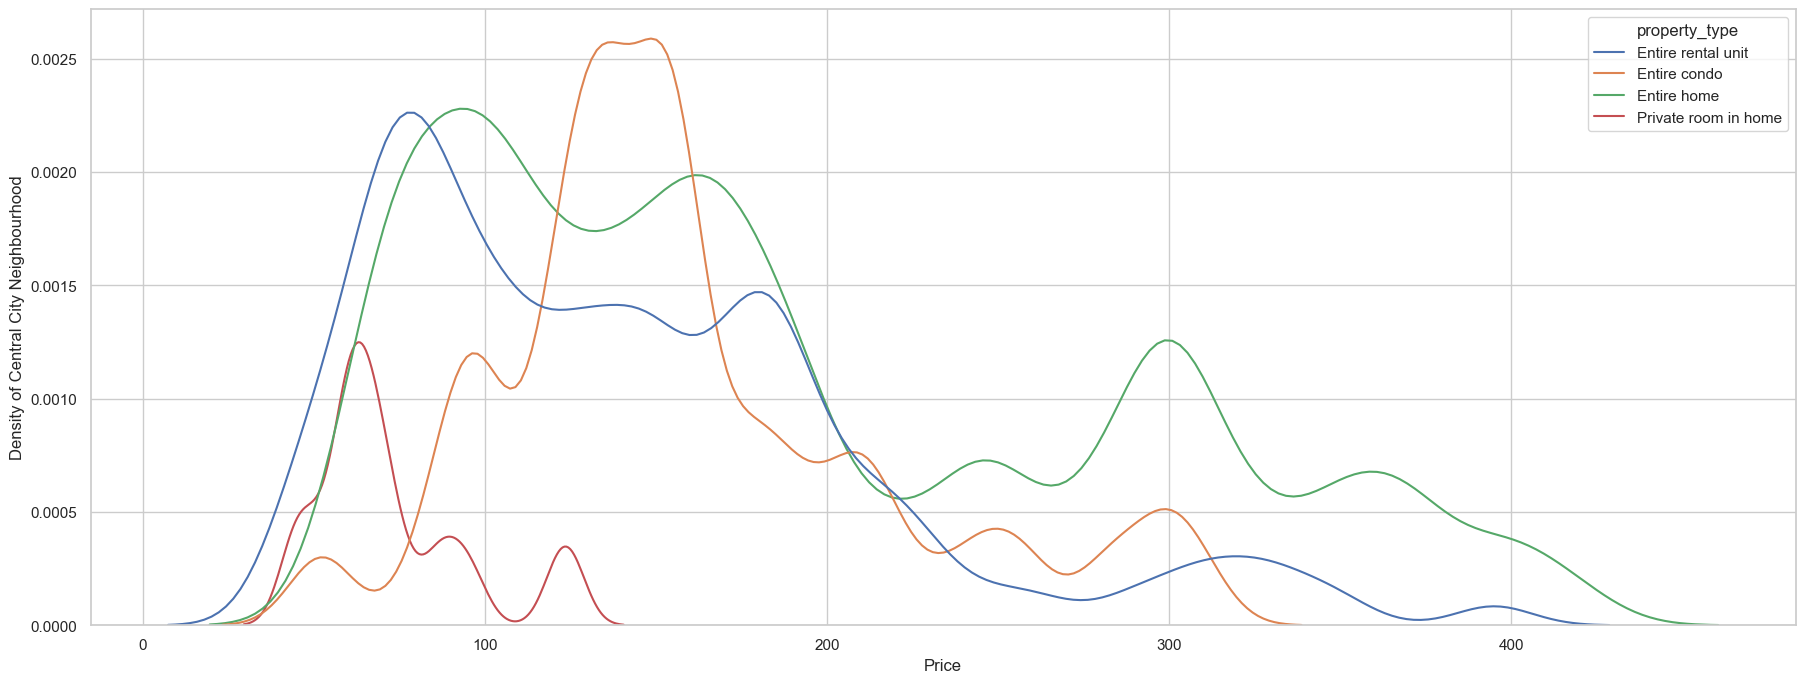

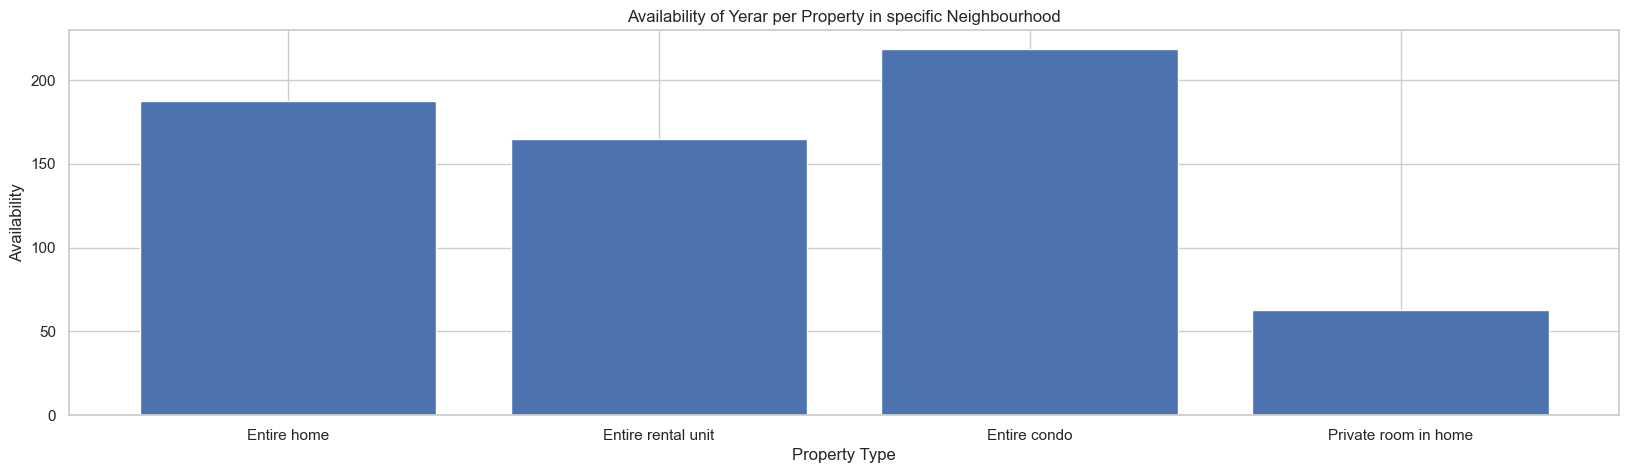

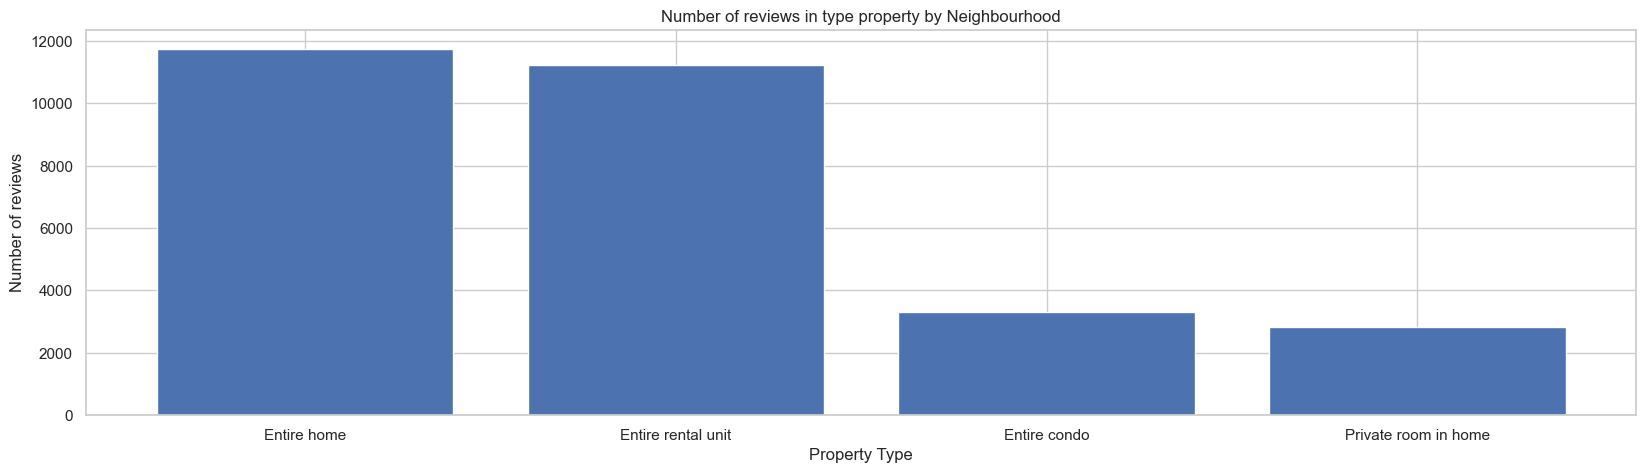

1

In [39]:
#If you want only cagange the neighnorhood and see the change, popular neighnorhoods:Central Business District,Central City,Seventh WardTreme - Lafitte
neighbourhoodAnalysis='Central City'
bestNeighBydisponibilty(neighbourhoodAnalysis)
meanOcupationByNeig(neighbourhoodAnalysis)
countNumberOfreviws(neighbourhoodAnalysis)

In [40]:
#Set a list with the most important amenities and its count in the list of services of each regsitre 
AMENITIES_DATA = set()
for index, row in listings_df.iterrows():
    amenities_json = eval(row['amenities'])  # Convertir el JSON en un diccionario
    AMENITIES_DATA.update(amenities_json)
amenitiesDF= getIndividualAmenities(AMENITIES_DATA)

for amenitie in amenitiesDF:
    counTAmenitie=0
    for index, row in listings_df.iterrows():
        if amenitie in row['amenities'].lower():
            counTAmenitie+=1
    popularAmeniteies.update({amenitie:counTAmenitie})
# Sort the dictionary by values in ascending order
mostPouplar20 = dict(sorted(popularAmeniteies.items(), key=lambda item: item[1], reverse=True))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


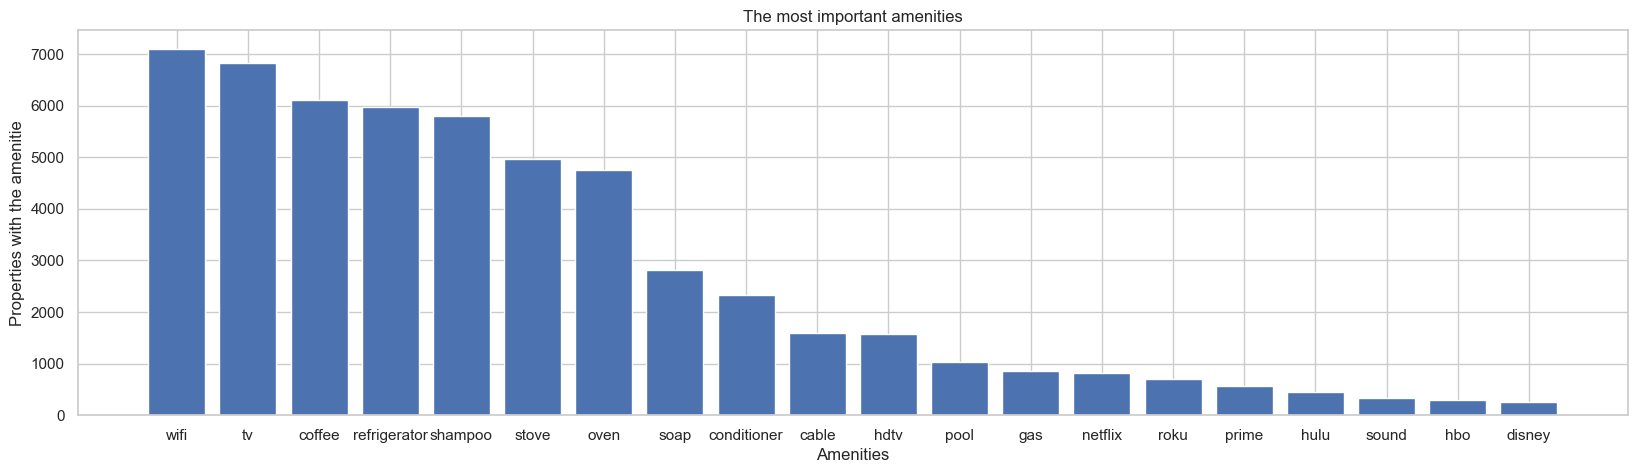

In [41]:
#show a result
keys = list(mostPouplar20.keys())
values = list(mostPouplar20.values())
# Create a bar plot
plt.figure(figsize=(20, 5))
plt.bar(keys, values)
# Add labels and title
plt.xlabel('Amenities')
plt.ylabel('Properties with the amenitie')
plt.title('The most important amenities')
# Display the plot
plt.show()